In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
dataset=pd.read_csv("C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset\\Marketing_campaign.csv")

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [48]:
dataset.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [49]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

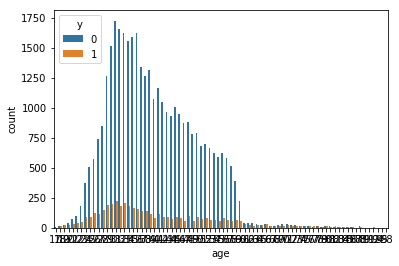

In [50]:
sns.countplot(x=dataset.age,hue=dataset.y)

In [51]:
dataset['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
dataset.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [61]:
print(dataset['age'].dtype)

int64


In [88]:
col=0
def objectCov(df):
    for i in df:
       # print(i)
        if(df[i].dtype=='object'):
            colName=i+'_dummy'
            print(i)
            dummyColumns=pd.get_dummies(df[i],prefix=colName,dummy_na=False)
            df=df.drop(i,1)
            df=pd.concat([df,dummyColumns],axis=1)
            
        
    return df

newDF=objectCov(dataset)
        

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [89]:
newDF.head(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_dummy_oct,month_dummy_sep,day_of_week_dummy_fri,day_of_week_dummy_mon,day_of_week_dummy_thu,day_of_week_dummy_tue,day_of_week_dummy_wed,poutcome_dummy_failure,poutcome_dummy_nonexistent,poutcome_dummy_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0


In [90]:
newDF.dtypes

age                             int64
duration                        int64
campaign                        int64
pdays                           int64
previous                        int64
emp_var_rate                  float64
cons_price_idx                float64
cons_conf_idx                 float64
euribor3m                     float64
nr_employed                   float64
y                               int64
job_dummy_admin.                uint8
job_dummy_blue-collar           uint8
job_dummy_entrepreneur          uint8
job_dummy_housemaid             uint8
job_dummy_management            uint8
job_dummy_retired               uint8
job_dummy_self-employed         uint8
job_dummy_services              uint8
job_dummy_student               uint8
job_dummy_technician            uint8
job_dummy_unemployed            uint8
job_dummy_unknown               uint8
marital_dummy_divorced          uint8
marital_dummy_married           uint8
marital_dummy_single            uint8
marital_dumm

In [91]:
Y=dataset['y']

In [96]:
X=dataset.drop('y',1)
X=newDF

In [97]:
Y.head(2)

0    0
1    0
Name: y, dtype: int64

In [98]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [99]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(Xtrain,Ytrain)

C:\Users\Rebecca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
YPred=logreg.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
print('Accuracy')
print(format(logreg.score(Xtest,Ytest)))

Accuracy
0.9995144452537024


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kFold=